# Data Exploration: Glassdoor reviews

Brief: Improve employee satisfaction by using real Glassdoor reviews to propose targeted programming for a segment of employees.

## Data exploration

### Sourcing Data

What is the standard way to import pandas functionality into your notebook?

In [0]:
import pandas as pd

How can you use pandas to read the data from the CSV file? How can you store that data for later use?

In [0]:
# TEMP
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/Team Drives/Decoded NY/Data Bootcamp/Content/Product development/Pilot/Glassdoor Data/glassdoor_reviews.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Temp for now
df = df.drop(columns=['approve_ceo', 'pros', 'cons', 'advice_to_mgmt'])

### Stage 2: Explore and Transform

### Initial Look at Data

What do the first few rows of the DataFrame look like? What kinds of values are in the dataset and what do they represent?

In [0]:
df.head()

,date,employee_title,location,employee_status,outlook,recommend,review_title,years_at_company,helpful,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt,company_name
0,Mon Jun 24 2019 19:34:24 GMT-0700 (Pacific Day...,Senior SAP Basis Administrator,"New York, NY",Current Employee,Positive,Recommends,Awesome Company,1.0,NaN,5.0,3.0,4.0,3.0,4.0,4.0,Bloomberg
1,Sat Jun 22 2019 10:24:26 GMT-0700 (Pacific Day...,Team Leader,NaN,Current Employee,Positive,Recommends,Fantastic place to work with a very high ceiling!,1.0,1.0,5.0,5.0,4.0,5.0,4.0,5.0,Bloomberg
2,Tue Jun 18 2019 11:59:01 GMT-0700 (Pacific Day...,Enterprise Sales,"New York, NY",Former Employee,Positive,Recommends,bloomberg,3.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,Bloomberg
3,Tue Jun 11 2019 08:06:31 GMT-0700 (Pacific Day...,Sales and Relationship Manager,"New York, NY",Former Employee,Positive,Recommends,Great company to learn and experience the fina...,NaN,4.0,4.0,4.0,3.0,3.0,3.0,2.0,Bloomberg
4,Thu Jun 20 2019 05:52:34 GMT-0700 (Pacific Day...,Bloomberg Intelligence Associate,"New York, NY",Former Employee,Positive,Recommends,Great place to learn and start career,5.0,NaN,4.0,3.0,5.0,5.0,5.0,3.0,Bloomberg


How much data is in this dataset?

In [0]:
df.shape

(24485, 16)

What is an average value for each column?

In [0]:
df.describe()

,years_at_company,helpful,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt
count,14767.000000,6750.000000,24485.000000,21327.00000,21198.000000,21127.000000,20987.000000,20651.000000
mean,2.672784,3.048741,3.555687,3.25517,3.446528,3.401335,3.657979,3.040918
std,2.165896,14.001518,1.153320,1.28455,1.320625,1.239795,1.097830,1.320364
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,2.00000,3.000000,3.000000,3.000000,2.000000
50%,1.000000,1.000000,4.000000,3.00000,4.000000,4.000000,4.000000,3.000000
75%,3.000000,3.000000,4.000000,4.00000,5.000000,4.000000,5.000000,4.000000
max,8.000000,895.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000


What other information would be useful from an initial survey, and how can we get that information?

In [0]:
df.columns

Index(['date', 'employee_title', 'location', 'employee_status', 'outlook',
       'recommend', 'review_title', 'years_at_company', 'helpful',
       'rating_overall', 'rating_balance', 'rating_culture', 'rating_career',
       'rating_comp', 'rating_mgmt', 'company_name'],
      dtype='object')

In [0]:
df['company_name'].unique()

array(['Bloomberg', 'Apple', 'Friedkin Group', 'GE', 'JPMorgan Chase',
       'Liberty Mutual', 'Toyota', 'PepsiCo'], dtype=object)

### Data Questions

Write three questions about the data, then use Python and pandas to answer your questions. For example,

- Which reviews were the most helpful?
- How many reviews rate working for the company a 5 overall?
- Which job titles rated culture above a 3?
- How many reviews say they worked for the company for more than 5 years and rated working for the company below a 3?
- Which company in our dataset has the most 5 overall ratings?

Suggested question starters:
- "Which reviews..."
- "How many reviews..."

In [0]:
# SHOW: Which reviews are about working at Apple? How many are there? (Note quotes on Apple)
df_apple = df.query("company_name == 'Apple'")
df_apple.shape

(2189, 16)

In [0]:
# SHOW: Initial look at Apple data -- anything interesting stand out?
df_apple.describe()

,years_at_company,helpful,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt
count,1426.000000,483.000000,2189.000000,1884.000000,1870.000000,1867.000000,1853.000000,1835.000000
mean,2.589060,6.650104,4.015075,3.363057,4.098930,3.540975,4.183486,3.476294
std,1.944707,49.263494,1.086417,1.327368,1.233277,1.264914,1.002054,1.352271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000
50%,1.000000,2.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000
75%,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,8.000000,895.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [0]:
#
# CHECKPOINT: All learners have a new dataframe for their own company and understand
# that to work with their own data, they need to use their own the new variable name.
#

In [0]:
# SHOW: There's some review that is much more helpful than standard -- which one? (Note no quotes on 895)
df_apple.query("helpful == 895")

,date,employee_title,location,employee_status,outlook,recommend,review_title,years_at_company,helpful,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt,company_name
1610,Thu Aug 28 2014 21:07:35 GMT-0700 (Pacific Day...,Anonymous Employee,NaN,Current Employee,Positive,Recommends,"Challenging, Rewarding, but ZERO work/life bal...",1.0,895.0,4.0,1.0,3.0,3.0,3.0,3.0,Apple


In [0]:
# SHOW: This employee is anonymous - what are some possible Apple titles?
df_apple["employee_title"].unique()

array(['Product Specialist', 'Anonymous Employee',
       'Apple At Home Advisor', 'Specialist', 'Reseller Specialist',
       'Software Engineer', 'Technical Specialist', 'Team Lead',
       'Redzone Specialist', 'Technical Expert',
       'Learning and Development Specialist', 'Product Zone Specialist',
       'Client Engineer', 'Genius', 'Expert', 'Senior Counsel',
       'Verification Design Engineer', 'Project Manager',
       'Technician Specialist', 'Business Expert',
       'Senior Technical Support Advisor', 'Operations', 'Internship',
       'Sales/Customer Service Online Store', 'Vice President Sales',
       'Apple Technical Specialist', 'Full Stack Developer',
       'Senior Optical Engineer', 'Sales Associate',
       'GPU Performance Engineer', 'Tech Support, Mentor',
       'Marketing Lead', 'Apple Sales Specialist', 'Business Manager',
       'Administrative Assistant', 'Senior Advisor', 'Technical Advise',
       'Apple Genius', 'genious', 'Apple AHA', 'College IOS Ad

In [0]:
# SHOW: That's a lot! How many?
# Google 'number of unique values in column pandas' to find .nunique() on Stackoverflow.
# Talk about effective Googling, such as being specific, including pandas/Python, and how to parse Stackoverflow
df_apple["employee_title"].nunique()

404

In [0]:
# SHOW: How many overall 5 ratings?
df_apple.query("rating_overall == 5").shape

(902, 16)

In [0]:
# SHOW: What percent of ratings are 5s? Model breaking question down and storing in variables

# Need number of 5s
rated5apple = df_apple.query("rating_overall == 5").shape[0]

# Need total number
total_apple = df_apple.shape[0]

print(rated5apple/total_apple)

# SHOW: Google "format as a percent python" or equivalent to model finding a tutorial
# Share that participants should actively try to do new things independently
print("{:.2%} of Apple reviews gave a 5 rating overall!".format(rated5apple/total_apple));

0.4120603015075377
41.21% of Apple reviews gave a 5 rating overall!


In [0]:
#
# Release people to ask/answer their own questions
# Example learner behavior follows
#

In [0]:
df_bloomberg = df.query("company_name == 'Bloomberg'")
df_bloomberg.query("employee_title == 'Analyst' & years_at_company > 3").describe()

,years_at_company,helpful,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt
count,6.000000,2.000000,6.000000,5.00000,5.0,4.000000,4.000000,4.000000
mean,5.500000,14.000000,3.666667,3.80000,4.0,2.750000,3.500000,3.500000
std,1.224745,8.485281,1.211060,1.30384,1.0,0.957427,1.290994,1.290994
min,5.000000,8.000000,2.000000,2.00000,3.0,2.000000,2.000000,2.000000
25%,5.000000,11.000000,3.000000,3.00000,3.0,2.000000,2.750000,2.750000
50%,5.000000,14.000000,3.500000,4.00000,4.0,2.500000,3.500000,3.500000
75%,5.000000,17.000000,4.750000,5.00000,5.0,3.250000,4.250000,4.250000
max,8.000000,20.000000,5.000000,5.00000,5.0,4.000000,5.000000,5.000000


In [0]:
print(df_bloomberg.query("employee_title == 'Analyst' & years_at_company > 3").shape)

(6, 16)


In [0]:
df_bloomberg.query("employee_title == 'Analyst' & years_at_company > 3", engine='python')["employee_title"].unique()

array(['Analyst'], dtype=object)

In [0]:
# TODO: change strings to actual strings in dataset
df_bloomberg.query('employee_title.str.contains("Analyst") & years_at_company > 3', engine='python').describe()

,years_at_company,helpful,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt
count,33.000000,19.000000,33.000000,29.000000,29.000000,28.000000,28.000000,28.000000
mean,5.636364,6.368421,3.242424,3.655172,3.551724,2.535714,3.571429,2.428571
std,1.245446,7.319764,1.031695,1.421163,1.325201,1.035737,1.168366,1.230133
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.750000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,2.000000,4.000000,2.000000
75%,5.000000,7.000000,4.000000,5.000000,5.000000,3.000000,4.250000,3.000000
max,8.000000,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [0]:
df_bloomberg.query('employee_title.str.contains("Analyst") & years_at_company > 3', engine='python')["employee_title"].unique()

array(['Operations Analyst', 'Data Analyst', 'Analyst',
       'Global Data Analyst', 'Senior Equity Research Analyst',
       'Senior Analyst', 'Quantitative Research Analyst',
       'Programmer Analyst', 'Global Fixed Income Data Analyst',
       'Service Desk Analyst', 'Quantitative Analyst', 'Legal Analyst',
       'Equity Analyst', 'Equity Research Analyst',
       'Media Analyst SAP ~ Traverse', 'Media Analyst', 'Credit Analyst',
       'Research Analyst'], dtype=object)

### Data Visualization

How many reviews earned each overall rating 1-5?

In [0]:
# SHOW: Using cheatsheet to find value_counts()
df_apple['rating_overall'].value_counts()

5.0    902
4.0    729
3.0    342
2.0    121
1.0     95
Name: rating_overall, dtype: int64

In [0]:
# SHOW: Looking closely at output, using sort_index(), note value_counts sorts on count
df_apple['rating_overall'].value_counts().sort_index()

1.0     95
2.0    121
3.0    342
4.0    729
5.0    902
Name: rating_overall, dtype: int64

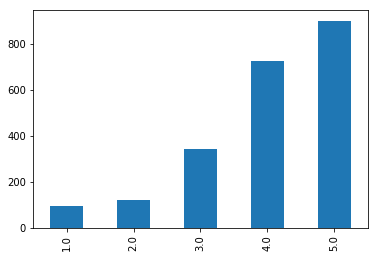

In [0]:
# SHOW: Seeing the numbers it's hard to compare. A graph would be great!
# Only adding .plot.bar() compared to cells above
df_apple['rating_overall'].value_counts().sort_index().plot.bar()

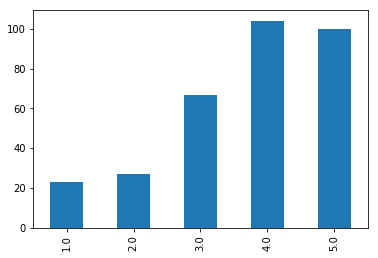

In [0]:
# SHOW: Graphs help us answer comparison questions such as:
# Do employees who have been at a company longer rate working there higher?
df_apple.query('years_at_company > 4')['rating_overall'].value_counts().sort_index().plot.bar()

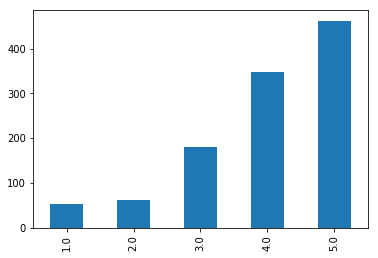

In [0]:
# Talk about distribution
df_apple.query('years_at_company <= 4')['rating_overall'].value_counts().sort_index().plot.bar()

In [0]:
# Less senior employee graph looks like overall graph -- how many people fit in each group?
print("4 years or less: {}".format(df_apple.query('years_at_company <= 4').shape[0]))
print("More than 4 years: {}".format(df_apple.query('years_at_company > 4').shape[0]))

4 years or less: 1105
More than 4 years: 321


In [0]:
#
# Learners write comparison questions and answer them using bar graphs
#

How do overall ratings change over time?

In [0]:
# ASK: What kind of plot would we expect? (line) Do we want every point? (Probably not, we'd like average per month)
# SHOW: What is time? What type? Talk about types if you have not already
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 1609 to 3797
Data columns (total 16 columns):
date                2189 non-null object
employee_title      2187 non-null object
location            1128 non-null object
employee_status     2189 non-null object
outlook             2189 non-null object
recommend           2189 non-null object
review_title        2188 non-null object
years_at_company    1426 non-null float64
helpful             483 non-null float64
rating_overall      2189 non-null float64
rating_balance      1884 non-null float64
rating_culture      1870 non-null float64
rating_career       1867 non-null float64
rating_comp         1853 non-null float64
rating_mgmt         1835 non-null float64
company_name        2189 non-null object
dtypes: float64(8), object(8)
memory usage: 290.7+ KB


In [0]:
# SHOW: We want datetime type - looking at a date string, we can see we just want the first section of the review
# We will rewrite the. values in the existing date column
df_apple["date"] = pd.to_datetime(df_apple.date.str[0:15])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
# SHOW: we can also make new columns
# Describe lambda function, but not important for learners to be able to make their own
df_apple["month"] = df_apple["date"].apply(lambda t: t.month)
df_apple["year"] = df_apple["date"].apply(lambda t: t.year)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
# SHOW: check our work
df_apple.head()

,date,employee_title,location,employee_status,outlook,recommend,review_title,years_at_company,helpful,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt,company_name,month,year
1609,2019-06-27,Product Specialist,"Salt Lake City, UT",Former Employee,Positive,Recommends,Great place to work!,1.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,Apple,6,2019
1610,2014-08-28,Anonymous Employee,NaN,Current Employee,Positive,Recommends,"Challenging, Rewarding, but ZERO work/life bal...",1.0,895.0,4.0,1.0,3.0,3.0,3.0,3.0,Apple,8,2014
1611,2015-05-13,Apple At Home Advisor,"Lakewood, CO",Current Employee,Positive,Recommends,At-Home-Advisor,1.0,469.0,5.0,3.0,5.0,5.0,4.0,5.0,Apple,5,2015
1612,2017-03-10,Specialist,"Tempe, AZ",Current Employee,Positive,Recommends,A Company as Meticulous as Their Products!,1.0,257.0,5.0,4.0,5.0,5.0,4.0,5.0,Apple,3,2017
1613,2019-06-26,Anonymous Employee,NaN,Current Employee,Positive,Recommends,A trove of wonderful memories and experiences ...,NaN,NaN,4.0,3.0,4.0,5.0,5.0,4.0,Apple,6,2019


In [0]:
# SHOW: Groupby and mean (and/or other methods)
df_apple.groupby('date')['rating_overall'].mean()

date
2014-08-28    4.000000
2015-05-13    5.000000
2016-01-22    5.000000
2017-03-10    5.000000
2017-11-03    5.000000
2017-12-14    5.000000
2017-12-17    5.000000
2017-12-18    5.000000
2017-12-19    5.000000
2017-12-21    4.333333
2017-12-22    4.000000
2017-12-23    5.000000
2017-12-27    4.000000
2017-12-28    4.750000
2017-12-29    3.000000
2017-12-30    4.750000
2018-01-01    4.666667
2018-01-02    4.166667
2018-01-03    3.600000
2018-01-04    4.444444
2018-01-05    3.333333
2018-01-06    4.000000
2018-01-07    5.000000
2018-01-08    4.000000
2018-01-09    4.500000
2018-01-10    4.333333
2018-01-11    4.375000
2018-01-12    3.750000
2018-01-14    5.000000
2018-01-15    3.571429
                ...   
2019-05-29    3.400000
2019-05-30    4.000000
2019-05-31    4.333333
2019-06-01    5.000000
2019-06-02    3.750000
2019-06-03    3.800000
2019-06-04    3.571429
2019-06-05    4.000000
2019-06-06    4.333333
2019-06-07    3.500000
2019-06-08    4.000000
2019-06-09    4.500000
2019-0

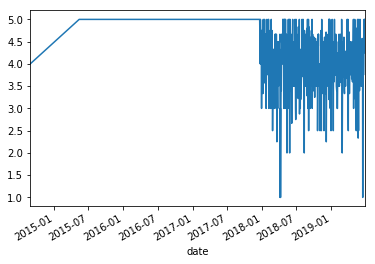

In [0]:
# Line graph of average overall rating per day
df_apple.groupby('date')['rating_overall'].mean().plot.line()

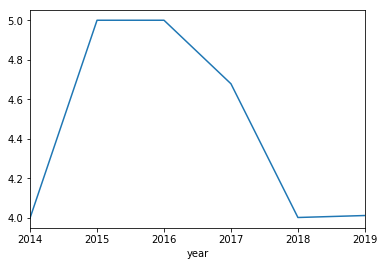

In [0]:
# Line graph of average overall rating per year
df_apple.groupby('year')['rating_overall'].mean().plot.line()

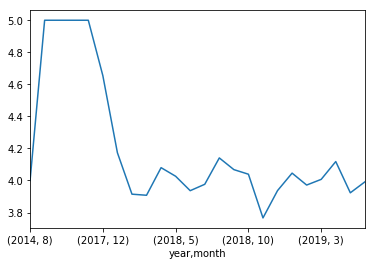

In [0]:
# Line graph of average overall rating per month
df_apple.groupby(['year', 'month'])['rating_overall'].mean().plot.line()

Is the company getting more senior over time?

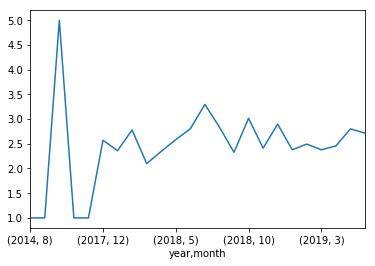

In [0]:
# Years at company over time
df_apple.groupby(['year', 'month'])['years_at_company'].mean().plot.line()

How do the ratings from reviews that recommend working at the company compare to those reviews that do not?

In [0]:
df_apple.groupby(['rating_overall', 'recommend']).size()

rating_overall  recommend        
1.0             Doesn't Recommend     20
                Recommends            75
2.0             Doesn't Recommend     29
                Recommends            92
3.0             Doesn't Recommend     81
                Recommends           261
4.0             Doesn't Recommend    118
                Recommends           611
5.0             Doesn't Recommend    142
                Recommends           760
dtype: int64

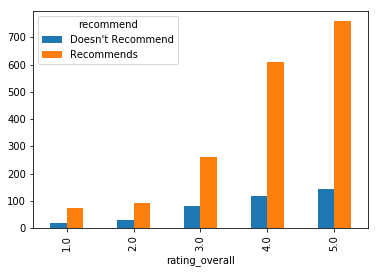

In [0]:
# SHOW: unstack()
df_apple.groupby(['rating_overall', 'recommend']).size().unstack().plot.bar()

In [0]:
'''
Hard to tell!
Seems like the intuition that recommenders would rate the company more highly is true,
but there are far more people who recommend than don't. It'd be nice to see these as percentages.

Python allows us to create custom functions, or repeatable actions in code.
We've made one that creates a graph from a groupby dataframe that shows the percent of reviews in each category.

Let's use it to show the percent of reviews from each category (Recommends or
Doesn't Recommend) that give each of the five ratings.
'''

"\nHard to tell!\nSeems like the intuition that recommenders would rate the company more highly is true,\nbut there are far more people who recommend than don't. It'd be nice to see these as percentages.\n\nPython allows us to create custom functions, or repeatable actions in code.\nWe've made one that creates a graph from a groupby dataframe that shows the percent of reviews in each category.\n\nLet's use it to show the percent of reviews from each category (Recommends or\nDoesn't Recommend) that give each of the five ratings.\n"

In [0]:
def plot_percentages(gbdf):
  my_colors = [(1/(x+1), x*.2, (x+2.5)%5*.1) for x in range(5)]
  ax = gbdf.size().groupby(level=0).apply(lambda g: g / g.sum()).unstack().plot.bar(color=my_colors)
  vals = ax.get_yticks()
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

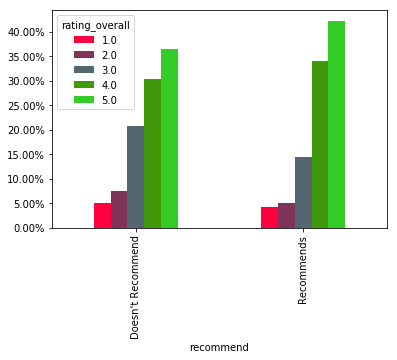

In [0]:
my_gbdf = df_apple.groupby(['recommend', 'rating_overall'])
plot_percentages(my_gbdf)

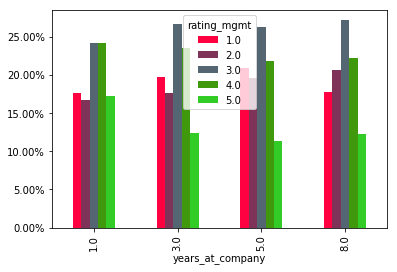

In [0]:
# SHOW: Using the same function, we can plot other comparisons.
my_gbdf2 = df.groupby(['years_at_company', 'rating_mgmt'])
plot_percentages(my_gbdf2)

# Raw notes and exploration follow

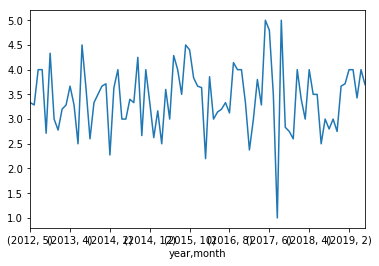

In [0]:
df.query('years_at_company == 1').groupby(['year', 'month'])['rating_overall'].mean().plot.line()

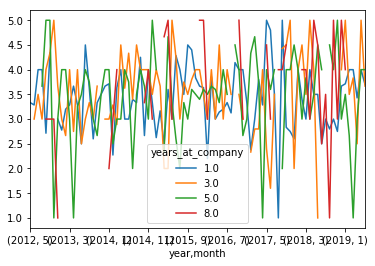

In [0]:
df.groupby(['year', 'month', 'years_at_company'])['rating_overall'].mean().unstack().plot.line()

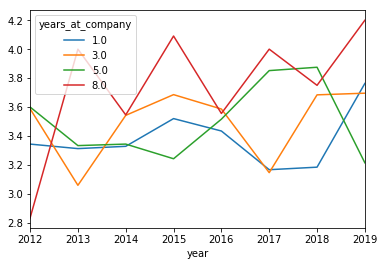

In [0]:
df.groupby(['year', 'years_at_company'])['rating_overall'].mean().unstack().plot.line()

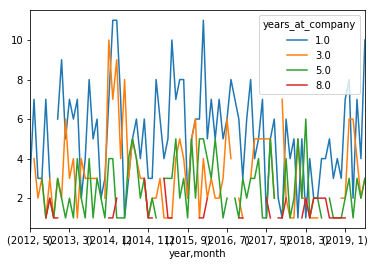

In [0]:
df.groupby(['year', 'month', 'years_at_company']).size().unstack().plot.line()

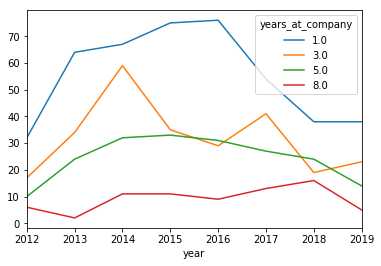

In [0]:
df.groupby(['year', 'years_at_company']).size().unstack().plot.line()

In [0]:
list(df['employee_title'].unique())

['Senior SAP Basis Administrator',
 'Team Leader',
 'Enterprise Sales',
 'Sales and Relationship Manager',
 'Bloomberg Intelligence Associate',
 'Financial Software Developer',
 'Data Analyst',
 'Data Journalist',
 'Sales Associate',
 'Team Lead',
 'Reporter',
 'Analyst',
 'Member of Technical Staff',
 'Event Planning Manager',
 'Advanced Specialist',
 'Customer Support',
 'Senior Software Engineer',
 'Anonymous Employee',
 'Sales Executive',
 'Software Engineer',
 'Operations Analyst',
 'Analytics Representative',
 'Senior Project Manager',
 'Enterprise',
 'Software Development Engineer',
 'Sales Account Manager',
 'Editorial Manager',
 'Senior Product Manager',
 'Technical Support Representative',
 'Financial Sales and Analytics',
 'Systems Reliability Engineer',
 'Senior Account Manager',
 'Senior Front End Engineer',
 'Recruiting Coordinator',
 'Financial Data Analyst',
 'Software Developer',
 'Software Engineer (internship)',
 'Editor',
 'Software',
 'Technical Operations',
 'Data

In [0]:
def f(row):
  if str(row['employee_title']).find("Analyst"):
    return "Analyst"
  elif str(row['employee_title']).find("Manager"):
    return "Management"
  elif str(row['employee_title']).find("Intern"):
    return "Intern"
  elif str(row['employee_title']).find("Software Engineer") or str(row['employee_title']).find("Software Developer"):
    return "Software Engineer"
  elif str(row['employee_title']).find("Editor"):
    return "Editor"
  return np.nan
                                      
df2 = df.copy()
df2["org"] = df.apply(f, axis=1)

In [0]:
df2['org'].unique()

array(['Analyst', 'Management'], dtype=object)

In [0]:
df.head()

,date,employee_title,location,employee_status,outlook,recommend,review_title,years_at_company,helpful,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt,month,year
0,2019-06-24,Senior SAP Basis Administrator,"New York, NY",Current Employee,Positive,Recommends,Awesome Company,1.0,NaN,5.0,3.0,4.0,3.0,4.0,4.0,6,2019
1,2019-06-22,Team Leader,NaN,Current Employee,Positive,Recommends,Fantastic place to work with a very high ceiling!,1.0,1.0,5.0,5.0,4.0,5.0,4.0,5.0,6,2019
2,2019-06-18,Enterprise Sales,"New York, NY",Former Employee,Positive,Recommends,bloomberg,3.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,6,2019
3,2019-06-11,Sales and Relationship Manager,"New York, NY",Former Employee,Positive,Recommends,Great company to learn and experience the fina...,NaN,4.0,4.0,4.0,3.0,3.0,3.0,2.0,6,2019
4,2019-06-20,Bloomberg Intelligence Associate,"New York, NY",Former Employee,Positive,Recommends,Great place to learn and start career,5.0,NaN,4.0,3.0,5.0,5.0,5.0,3.0,6,2019


In [0]:
df.query('employee_title == "Analyst"')

,date,employee_title,location,employee_status,outlook,recommend,review_title,years_at_company,helpful,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt,month,year
12,2019-06-07,Analyst,"Skillman, NJ",Former Employee,Neutral,Recommends,"Great place to work, just put in the effort an...",1.0,NaN,5.0,4.0,5.0,5.0,5.0,4.0,6,2019
61,2019-02-04,Analyst,"New York, NY",Current Employee,Neutral,Doesn't Recommend,Diversity and Inclusion — What a Joke!,5.0,20.0,2.0,3.0,3.0,2.0,2.0,2.0,2,2019
100,2019-01-22,Analyst,"Skillman, NJ",Former Employee,Positive,Recommends,Don't Take Offer,1.0,5.0,1.0,5.0,4.0,2.0,3.0,2.0,1,2019
126,2018-10-18,Analyst,"New York, NY",Current Employee,Negative,Doesn't Recommend,Great learning environment.,1.0,1.0,5.0,5.0,5.0,3.0,5.0,5.0,10,2018
133,2018-10-11,Analyst,"New York, NY",Current Employee,Positive,Recommends,great place to work,8.0,NaN,5.0,5.0,5.0,4.0,3.0,5.0,10,2018
148,2018-09-28,Analyst,NaN,Current Employee,Negative,Doesn't Recommend,Bloomberg Intelligence Equals Reputation Risk ...,NaN,16.0,1.0,1.0,1.0,1.0,1.0,1.0,9,2018
158,2018-07-23,Analyst,"New York, NY",Former Employee,Positive,Recommends,"Solid experience, Honest review",5.0,8.0,4.0,4.0,4.0,2.0,5.0,4.0,7,2018
285,2018-01-18,Analyst,"Washington, DC",Former Employee,Negative,Doesn't Recommend,Great Place to Work,5.0,NaN,5.0,5.0,5.0,NaN,NaN,NaN,1,2018
529,2017-02-24,Analyst,"New York, NY",Former Employee,Neutral,Doesn't Recommend,Analyst,3.0,7.0,1.0,3.0,1.0,1.0,1.0,1.0,2,2017
558,2017-01-21,Analyst,"Skillman, NJ",Former Employee,Neutral,Recommends,Horrible management,3.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2017


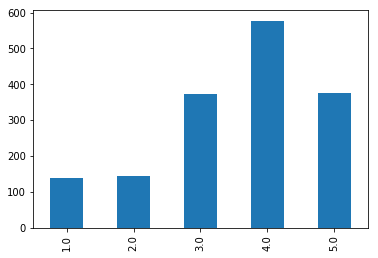

In [0]:
# Histogram of overall ratings
# TODO: Do these by company
df['rating_overall'].value_counts().sort_index().plot.bar()

In [0]:
df.groupby(['year', 'month'])['rating_overall'].count()

year  month
2012  4         3
      5         7
      6        11
      7         6
      8         9
      9        10
      10       10
      11        3
      12       14
2013  1        13
      2        14
      3        15
      4        12
      5        15
      6        12
      7        12
      8        21
      9        10
      10       16
      11        8
      12        9
2014  1        28
      2        29
      3        25
      4        13
      5        14
      6        16
      7        17
      8        21
      9        14
               ..
2017  1        29
      2        24
      3        27
      4        19
      5        23
      6        22
      7        18
      8        15
      9        25
      10       25
      11       17
      12       17
2018  1        26
      2        19
      3        24
      4        10
      5        19
      6        13
      7        18
      8        18
      9        14
      10       18
      11       12
      12       1

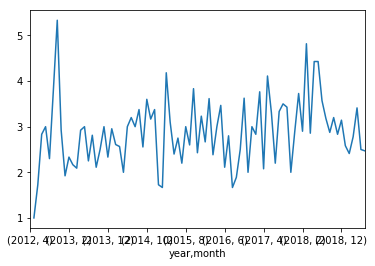

In [0]:
# Years at company over time
df.groupby(['year', 'month'])['years_at_company'].mean().plot.line()

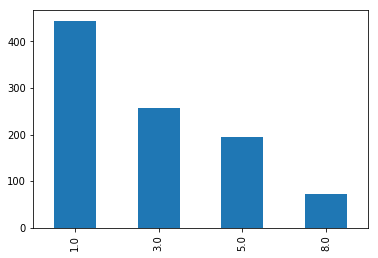

In [0]:
df['years_at_company'].value_counts().sort_index().plot.bar()

In [0]:
df['years_at_company'].value_counts()

1.0    444
3.0    257
5.0    195
8.0     73
Name: years_at_company, dtype: int64

Does glassdoor sort these buckets?

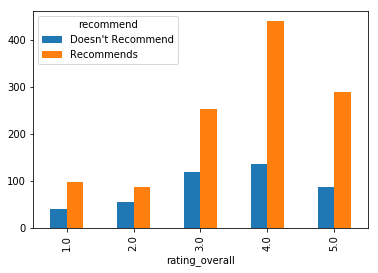

In [0]:
df.groupby(['rating_overall', 'recommend']).size().unstack().plot.bar()

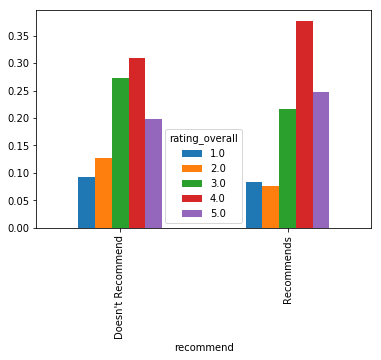

In [0]:
# Use percentages to make these easier to compare - follows intuitive expectations of more 4s and 5s
gb_size = df.groupby(['recommend', 'rating_overall']).size()
gb_size.groupby(level=0).apply(lambda g: g / g.sum()).unstack().plot.bar()

Same as above with years at company vs rating overall

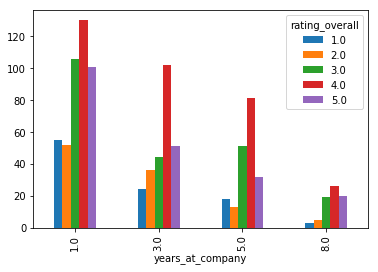

In [0]:
df.groupby(['years_at_company', 'rating_overall']).size().unstack().plot.bar()

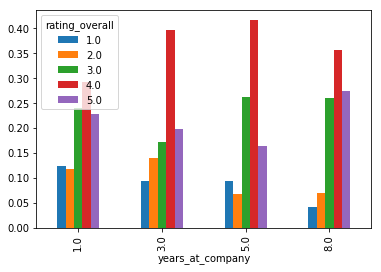

In [0]:
# Less interesting, but fewer 1s and 2s overall
gb_size = df.groupby(['years_at_company', 'rating_overall']).size()
gb_size.groupby(level=0).apply(lambda g: g / g.sum()).unstack().plot.bar()

In [0]:
df.columns

Index(['date', 'employee_title', 'location', 'employee_status', 'outlook',
       'recommend', 'review_title', 'years_at_company', 'helpful',
       'rating_overall', 'rating_balance', 'rating_culture', 'rating_career',
       'rating_comp', 'rating_mgmt', 'month', 'year'],
      dtype='object')

In [0]:
df.plot.scatter(x='outlook', y='rating_overall')

ValueError: ignored

In [0]:
df['outlook'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [0]:
vals = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['outlook_value'] = df['outlook'].replace(vals)

In [0]:
df['outlook_value']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1579   -1
1580   -1
1581   -1
1582   -1
1583   -1
1584   -1
1585   -1
1586   -1
1587   -1
1588   -1
1589    0
1590    0
1591    0
1592    0
1593    0
1594    0
1595    0
1596    0
1597    0
1598    0
1599    1
1600    1
1601    1
1602    1
1603    1
1604    1
1605    1
1606    1
1607    1
1608    1
Name: outlook_value, Length: 1609, dtype: int64

In [0]:
df.groupby(['outlook_value', 'rating_overall']).size().plot.scatter(x='outlook_value', y='rating_overall', )

#df.plot.scatter(x='outlook_value', y='rating_overall')

outlook_value  rating_overall
-1             1.0                20
               2.0                24
               3.0                43
               4.0                67
               5.0                36
 0             1.0                42
               2.0                46
               3.0               126
               4.0               139
               5.0                97
 1             1.0                77
               2.0                74
               3.0               204
               4.0               371
               5.0               243
dtype: int64

In [0]:
df.groupby(['outlook_value', 'rating_overall']).size()

outlook_value  rating_overall
-1             1.0                20
               2.0                24
               3.0                43
               4.0                67
               5.0                36
 0             1.0                42
               2.0                46
               3.0               126
               4.0               139
               5.0                97
 1             1.0                77
               2.0                74
               3.0               204
               4.0               371
               5.0               243
dtype: int64

In [0]:
df['helpful'].value_counts()

1.0     313
2.0     145
3.0      99
4.0      64
5.0      53
7.0      32
6.0      28
8.0      25
9.0      19
10.0     12
11.0     10
12.0      8
14.0      7
15.0      6
16.0      3
19.0      3
13.0      3
18.0      2
20.0      2
25.0      2
30.0      2
22.0      2
26.0      1
17.0      1
29.0      1
27.0      1
21.0      1
24.0      1
Name: helpful, dtype: int64

In [0]:
df['helpful'] = df['helpful'].fillna(0)

In [0]:
df['helpful'].value_counts()

0.0     763
1.0     313
2.0     145
3.0      99
4.0      64
5.0      53
7.0      32
6.0      28
8.0      25
9.0      19
10.0     12
11.0     10
12.0      8
14.0      7
15.0      6
16.0      3
19.0      3
13.0      3
18.0      2
20.0      2
25.0      2
30.0      2
22.0      2
17.0      1
26.0      1
29.0      1
27.0      1
21.0      1
24.0      1
Name: helpful, dtype: int64

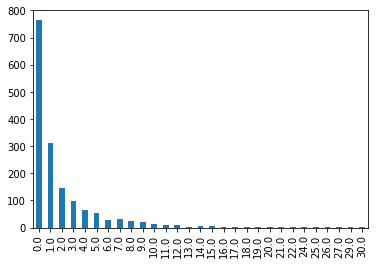

In [0]:
df['helpful'].value_counts().sort_index().plot.bar()

In [0]:
df.query('helpful > 10').describe()

,years_at_company,helpful,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt,month,year,outlook_value
count,48.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,2.833333,16.285714,2.089286,2.696429,2.303571,2.125000,3.214286,1.964286,6.642857,2016.517857,0.285714
std,1.960605,5.406105,1.210211,1.512609,1.347316,1.160917,1.260798,1.143587,3.523576,1.595346,0.824936
min,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2012.000000,-1.000000
25%,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2015.000000,0.000000
50%,3.000000,14.500000,2.000000,2.500000,2.000000,2.000000,3.000000,2.000000,7.000000,2017.000000,1.000000
75%,5.000000,19.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,10.000000,2018.000000,1.000000
max,8.000000,30.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,2019.000000,1.000000


In [0]:
df.describe()

,years_at_company,helpful,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt,month,year,outlook_value
count,969.000000,1609.000000,1609.000000,1408.000000,1401.000000,1393.000000,1384.000000,1353.000000,1609.000000,1609.000000,1609.000000
mean,2.862745,1.998757,3.563704,3.471946,3.566738,3.275305,3.877168,2.990392,6.036669,2015.652579,0.484152
std,2.122962,3.620698,1.188073,1.271340,1.308082,1.233853,1.061084,1.281663,3.458247,1.851245,0.697297
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2012.000000,-1.000000
25%,1.000000,0.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2014.000000,0.000000
50%,3.000000,1.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,6.000000,2016.000000,1.000000
75%,5.000000,2.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,9.000000,2017.000000,1.000000
max,8.000000,30.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,2019.000000,1.000000


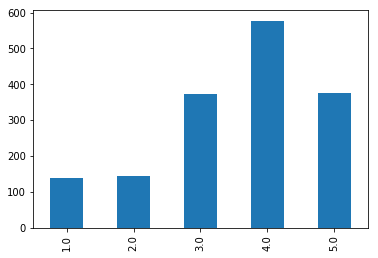

In [0]:
df['rating_overall'].value_counts().sort_index().plot.bar()

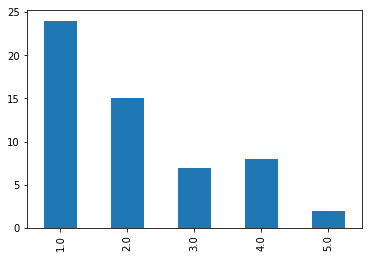

In [0]:
df.query('helpful > 10')['rating_overall'].value_counts().sort_index().plot.bar()

Aha! Helpful reviews tend to be more negative than the average review

Notes to self:
- opportunity to run code that works for one company on another sheet and have it work -- huge benefit over Excel